In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

from colorama import Fore
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\yoges\Downloads\acea-water-prediction\Aquifer_Petrignano.csv")
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [3]:
df.shape

(5223, 8)

In [4]:
# Drop the old rows
df = df[df['Rainfall_Bastia_Umbra'].notna()].reset_index(drop = True)

#Drop the unecessary columns 

df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis= 1)

df.head(10)

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3
5,06/01/2009,0.0,-31.00,-0.7,-29124.576,2.3
6,07/01/2009,0.0,-30.96,1.5,-31173.120,2.3
7,08/01/2009,0.0,-30.94,4.3,-30232.224,2.4
8,09/01/2009,0.9,-30.93,4.9,-30597.696,2.3
9,10/01/2009,0.0,-30.87,1.9,-31337.280,2.3


- The Petrignano waterbody is an underground water storage system called aquifer.
- This aquifer gets its water from 3 underground sources that are seprated by the layer of rocks.
- The amount of water in the aquifer depends upon : 
    - How much is the rainfall
    - How deep is the water 
    - The temperature
    - How much water is drained
    - The level of the river

In [5]:
# we will simplify the columns based on the above properties

df.columns = ['Date', 'rainfall', 'depth_ground_water', 'temperature', 'drainage_vol', 'river_hydrometry']

targets = ['depth_ground_water']
features = [feature for feature in df.columns if feature not in targets]

In [6]:
# As we are working on the time series data so we have to parse the date column

from datetime import date, datetime 

df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

df

,Date,rainfall,depth_ground_water,temperature,drainage_vol,river_hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...,...
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4


# Conclusion: 
    So, here we will be predicting the depth of ground water and how the water level is depends on the following properties.
- **Feature:**
    - **Rainfall** indicates the quality of the rain usually measured in (mm)
    - **Temperature** tells about the temperature in (*C)
    - **Drainage_vol** indicates the volume of the water drained from the water source measured in (m3)
    - **river_hydrometry** indicates the volume of the water in the river (m)

- **Target:**
    - **depth_ground_water** indicates the ground water level (m)

C:\Users\yoges\AppData\Local\Temp\ipykernel_6204\1540268949.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x = df['Date'], y = df[column].fillna(method = 'ffill'), ax = ax[i] )
C:\Users\yoges\AppData\Local\Temp\ipykernel_6204\1540268949.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x = df['Date'], y = df[column].fillna(method = 'ffill'), ax = ax[i] )
C:\Users\yoges\AppData\Local\Temp\ipykernel_6204\1540268949.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x = df['Date'], y = df[column].fillna(method = 'ffill'), ax = ax[i] )
C:\Users\yoges\AppData\Local\Temp\ipykernel_6204\1540268949.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a futur

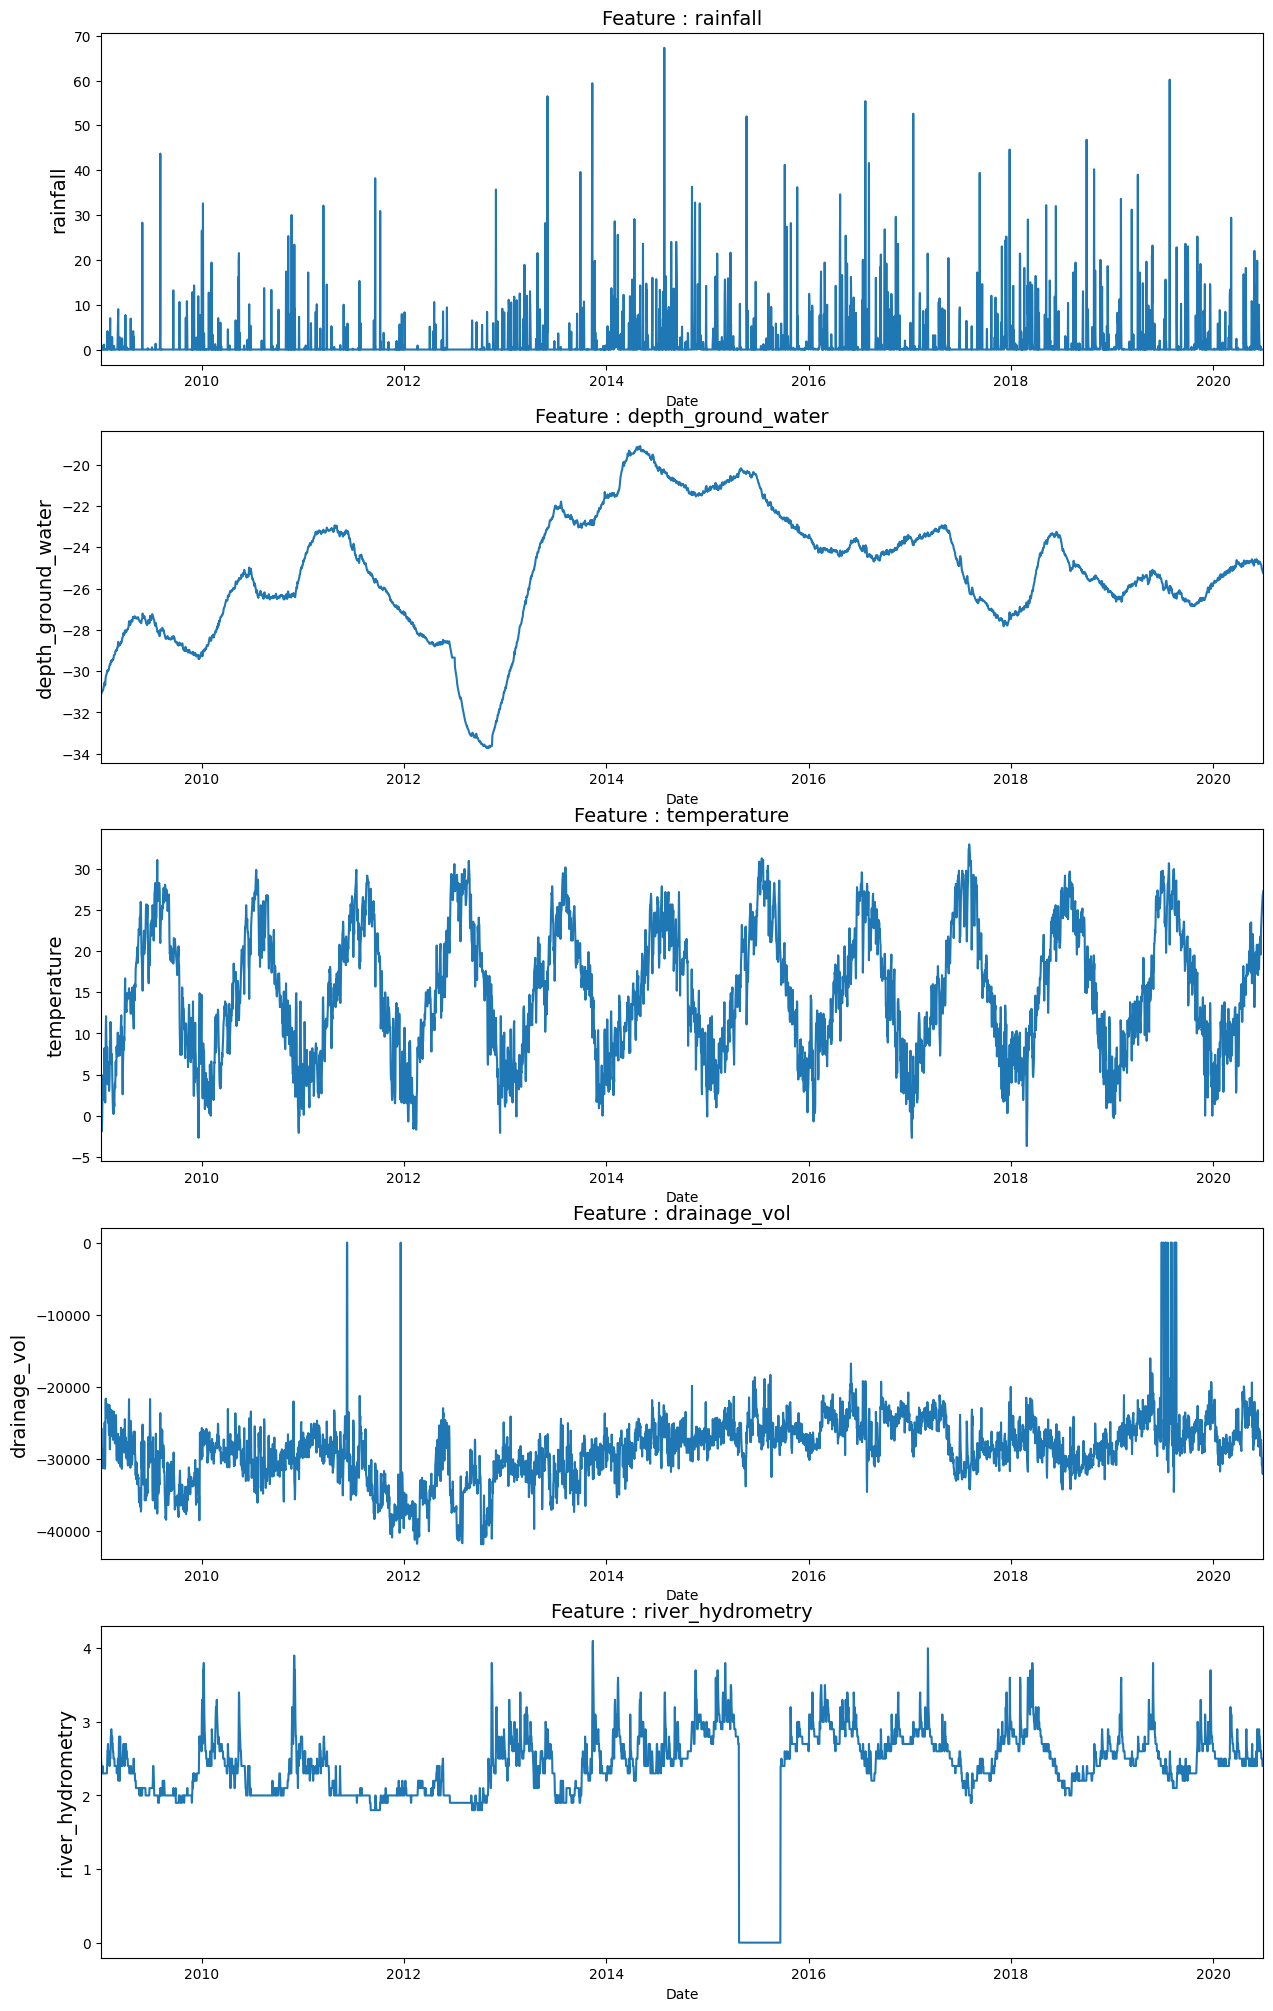

In [7]:
f , ax = plt.subplots(nrows= 5 , ncols= 1 , figsize = (15,25))

for i , column in enumerate (df.drop('Date', axis= 1).columns):
    sns.lineplot(x = df['Date'], y = df[column].fillna(method = 'ffill'), ax = ax[i] )
    ax[i].set_title('Feature : {}'.format(column), fontsize = 14)
    ax[i].set_ylabel(ylabel = column, fontsize = 14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)]) 

In [8]:
# To check if the order of the time interval is similar or not we have to sort values based on the date 

df = df.sort_values(by = 'Date')

df['interval'] = df['Date'] - df['Date'].shift(1)

df['interval'].sum(), df['interval'].count()


(Timedelta('4198 days 00:00:00'), np.int64(4198))

- In this case the time interval of the values is constant 1 day and it is in the chronoical order.

In [9]:
# from ydata-profiling import ProfileReport
#ProfileReport(df)

- As We can see from the profile report their are NaN values presented in the dataset and their are also zeros values which we have to replace with the NaN values.

In [10]:
df = df.drop('interval', axis= 1)

df.isna().sum()

Date                   0
rainfall               0
depth_ground_water    27
temperature            0
drainage_vol           1
river_hydrometry       0
dtype: int64

- First we will be fixing the zeros values

(np.float64(14245.0), np.float64(18443.0))

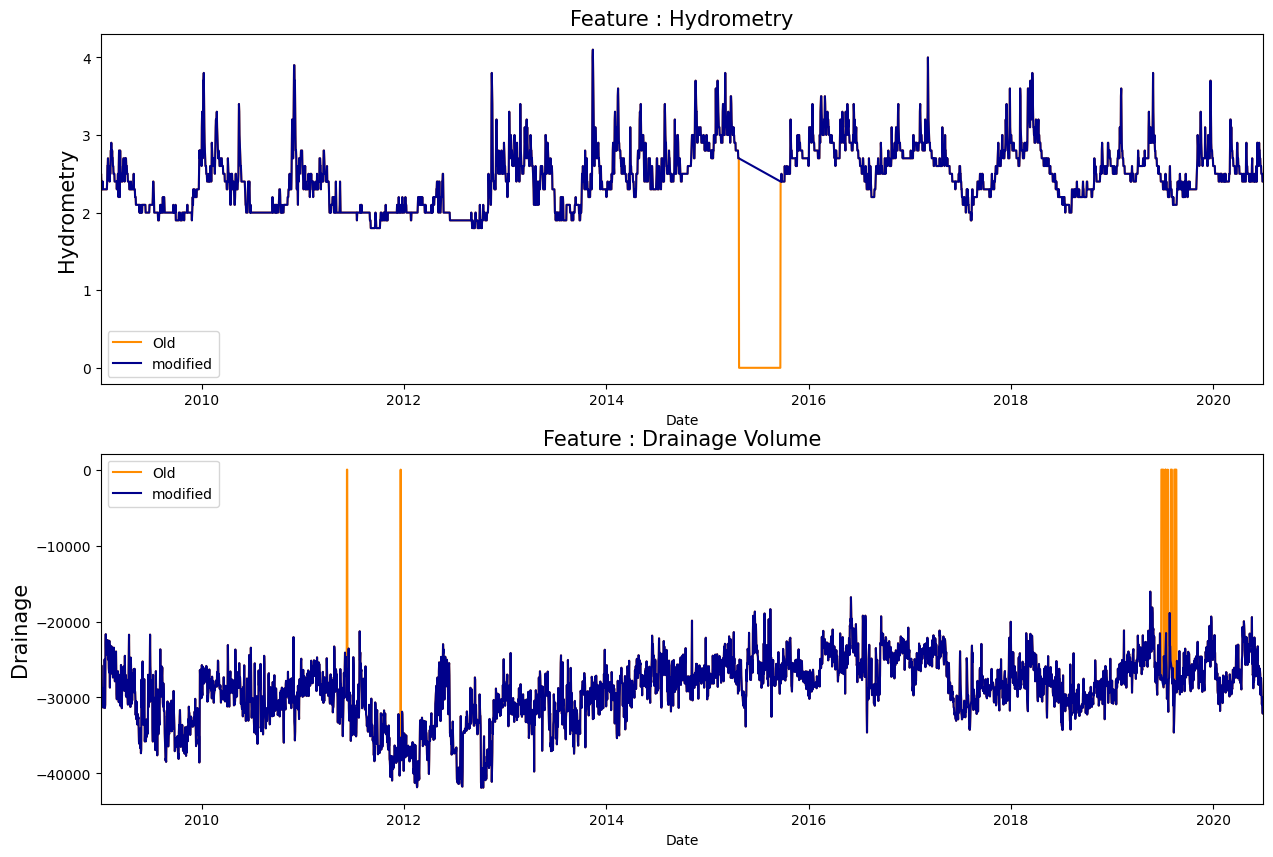

In [11]:
f , ax = plt.subplots(nrows= 2, ncols= 1 ,figsize = (15,10))

old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x = df['Date'], y = old_hydrometry, ax= ax[0], label = 'Old', color = 'darkorange')
sns.lineplot(x = df['Date'], y = df['river_hydrometry'], ax = ax[0], label = 'modified', color = 'darkblue')
ax[0].set_title('Feature : Hydrometry', fontsize = 15)
ax[0].set_ylabel('Hydrometry', fontsize = 15)
ax[0].set_xlim([date(2009,1,1), date(2020,6,30)])

old_drainage = df['drainage_vol'].copy()
df['drainage_vol'] = df['drainage_vol'].replace(0, np.nan)

sns.lineplot(x = df['Date'], y  = old_drainage, ax= ax[1], label = 'Old', color = 'darkorange')
sns.lineplot(x = df['Date'], y = df['drainage_vol'], ax = ax[1], label= 'modified', color = 'darkblue')
ax[1].set_title('Feature : Drainage Volume', fontsize = 15)
ax[1].set_ylabel('Drainage', fontsize = 15)
ax[1].set_xlim([date(2009,1,1), date(2020,6,30)])

In [12]:
df.isna().sum()

Date                    0
rainfall                0
depth_ground_water     27
temperature             0
drainage_vol           26
river_hydrometry      150
dtype: int64

- We cannot fill the Nan values with 0 because it will cause bigger flactuations in the data.
- Hence, we will be using the interpolation method

In [13]:
df['depth_ground_water'] = df['depth_ground_water'].interpolate()
df['drainage_vol'] = df['drainage_vol'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()

- As we can the data we are currently visualizing is based on days interval and it is can be hard to indentify the patterns so we will be doing the Data smoothing process or Data resampling process.
 - It can be done in two types : 
    - **Upsampling** : when the frequency of the samples is increased (ex: days to hours)
    - **downsampling** : when the frequency of the samples is decreased (ex: days to weeks, months)
    
- Here we will using the downsampling method for smoothing of the data for that their is .resample function.

C:\Users\yoges\AppData\Local\Temp\ipykernel_6204\2147682647.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = df[['Date', 'drainage_vol']].resample('M', on='Date').sum().reset_index(drop=False)
C:\Users\yoges\AppData\Local\Temp\ipykernel_6204\2147682647.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = df[['Date', 'temperature']].resample('M', on = 'Date').sum().reset_index(drop= False)


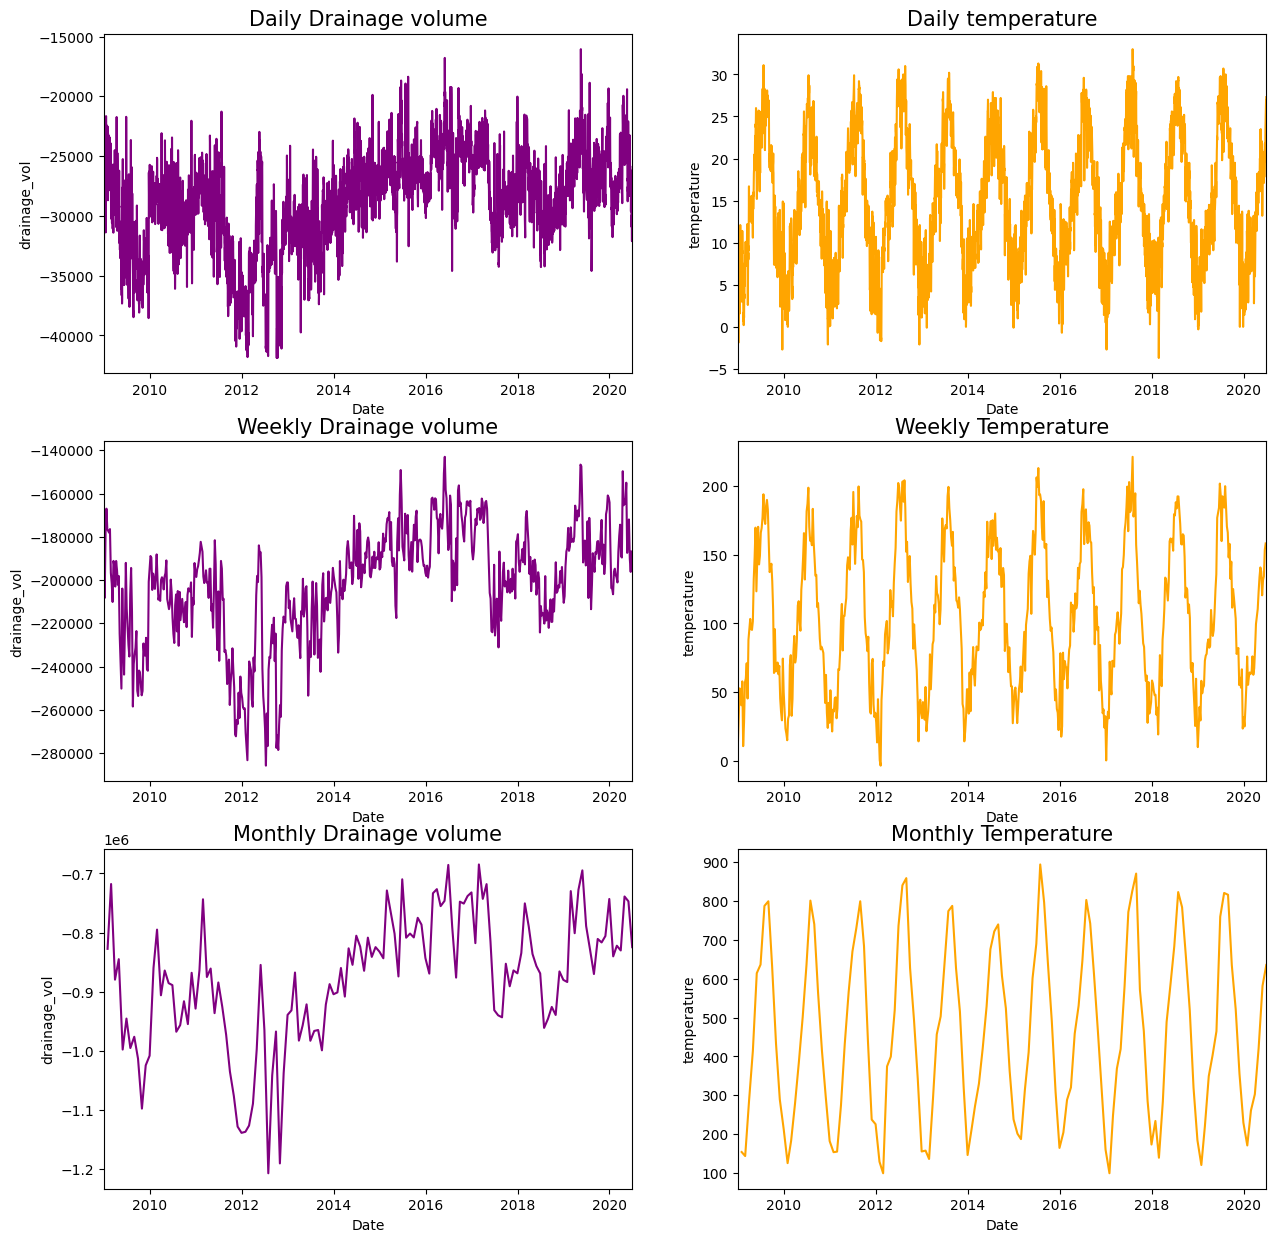

In [14]:
f, ax= plt.subplots(nrows=3, ncols=2, figsize = (15,15))

sns.lineplot(x = df['Date'], y = df['drainage_vol'], ax = ax[0,0], color = 'purple')
ax[0,0].set_title('Daily Drainage volume', fontsize = 15)

resampled_df = df[['Date', 'drainage_vol']].resample('7D', on= 'Date').sum().reset_index(drop=False)
sns.lineplot(x = resampled_df['Date'], y = resampled_df['drainage_vol'], ax = ax[1,0], color = 'purple')
ax[1,0].set_title('Weekly Drainage volume', fontsize = 15)

resampled_df = df[['Date', 'drainage_vol']].resample('M', on='Date').sum().reset_index(drop=False)
sns.lineplot(x = resampled_df['Date'], y = resampled_df['drainage_vol'], ax = ax[2,0], color = 'purple')
ax[2,0].set_title('Monthly Drainage volume', fontsize = 15)

for i in range(3):
    ax[i,0].set_xlim([date(2009,1,1), date(2020,6,30)])


sns.lineplot(x = df['Date'], y = df['temperature'], ax = ax[0,1], color = 'orange')
ax[0,1].set_title('Daily temperature', fontsize = 15)

resampled_df = df[['Date', 'temperature']].resample('7D', on = 'Date').sum().reset_index(drop=False)
sns.lineplot(x = resampled_df['Date'], y = resampled_df['temperature'], ax = ax[1,1], color = 'orange')
ax[1,1].set_title('Weekly Temperature', fontsize = 15)

resampled_df = df[['Date', 'temperature']].resample('M', on = 'Date').sum().reset_index(drop= False)
sns.lineplot(x = resampled_df['Date'], y = resampled_df['temperature'], ax = ax[2,1], color = 'orange')
ax[2,1].set_title('Monthly Temperature', fontsize = 15)

for i in range(3):
    ax[i,1].set_xlim([date(2009,1,1), date(2020,6,30)])

- We can see the pattern are quite visible and very much understandable in teh weekly format So, we will resample the whole dataframe into the weekly format

In [15]:
downsample = df[['Date', 'rainfall', 'depth_ground_water', 'temperature', 'drainage_vol', 'river_hydrometry']].resample('7D', on = 'Date').sum().reset_index(drop=False)
downsample

,Date,rainfall,depth_ground_water,temperature,drainage_vol,river_hydrometry
0,2009-01-01,0.0,-217.34,11.6,-197154.432,16.6
1,2009-01-08,2.0,-215.49,32.0,-208290.528,16.2
2,2009-01-15,0.2,-212.94,52.7,-178242.336,16.1
3,2009-01-22,4.1,-210.13,43.5,-166980.960,17.5
4,2009-01-29,9.9,-208.53,40.4,-176473.728,17.5
...,...,...,...,...,...,...
595,2020-05-28,24.6,-172.88,120.5,-179137.440,16.9
596,2020-06-04,46.2,-172.47,131.5,-171969.696,18.4
597,2020-06-11,20.0,-173.26,134.4,-190248.912,19.4
598,2020-06-18,1.4,-173.76,153.6,-196210.944,18.2


# Seasonality

Seasonality in a time series refers to regular, recurring patterns that repeat over fixed intervals (e.g., daily, monthly, yearly). These patterns are caused by factors like weather, holidays, or cultural events.

How to Recognize Seasonality:
Visual Inspection: Look for repeating cycles in a time series plot.
Autocorrelation (ACF): Spikes at specific lags indicate periodicity.
Decomposition: Methods like STL separate seasonality from trend and noise.
Fourier Analysis: Identifies dominant repeating cycles.
Statistical Tests: Tests like the Canova-Hansen detect seasonality.
Seasonality is modeled using tools like SARIMA, Holt-Winters, or feature engineering in machine learning models to improve forecasts.

<Axes: xlabel='Date', ylabel='temperature'>

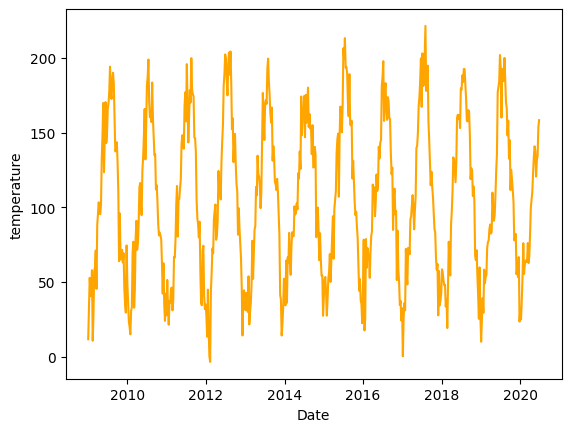

In [16]:
sns.lineplot(x = downsample['Date'], y = downsample['temperature'], color = 'orange')

# Stationarity : 
- Stationarity is a property of a time series dataset that means its statistical properties, such as mean, variance, and autocorrelation, remain constant over time. In other words, a stationary time series has the same patterns and trends throughout the entire dataset.

- some common ways to check for stationarity in a time series dataset:

    - Visual Inspection: Plot the time series data and look for any obvious patterns or trends. If the data appears to have a consistent pattern, it may be stationary.
    - Summary Statistics: Calculate summary statistics, such as mean, variance, and standard deviation, over different time periods. If these statistics remain relatively constant, the data may be         stationary.
    - Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Plots: These plots can help identify patterns in the data. If the ACF and PACF plots decay rapidly, it may indicate stationarity.
    - Unit Root Tests: These statistical tests, such as the Augmented Dickey-Fuller (ADF) test, can help determine if a time series is stationary or not.
    - Seasonal Decomposition: If the data has a strong seasonal component, decompose the time series into trend, seasonality, and residuals. If the residuals are stationary, the original data may be stationary.


(np.float64(14245.0), np.float64(18443.0))

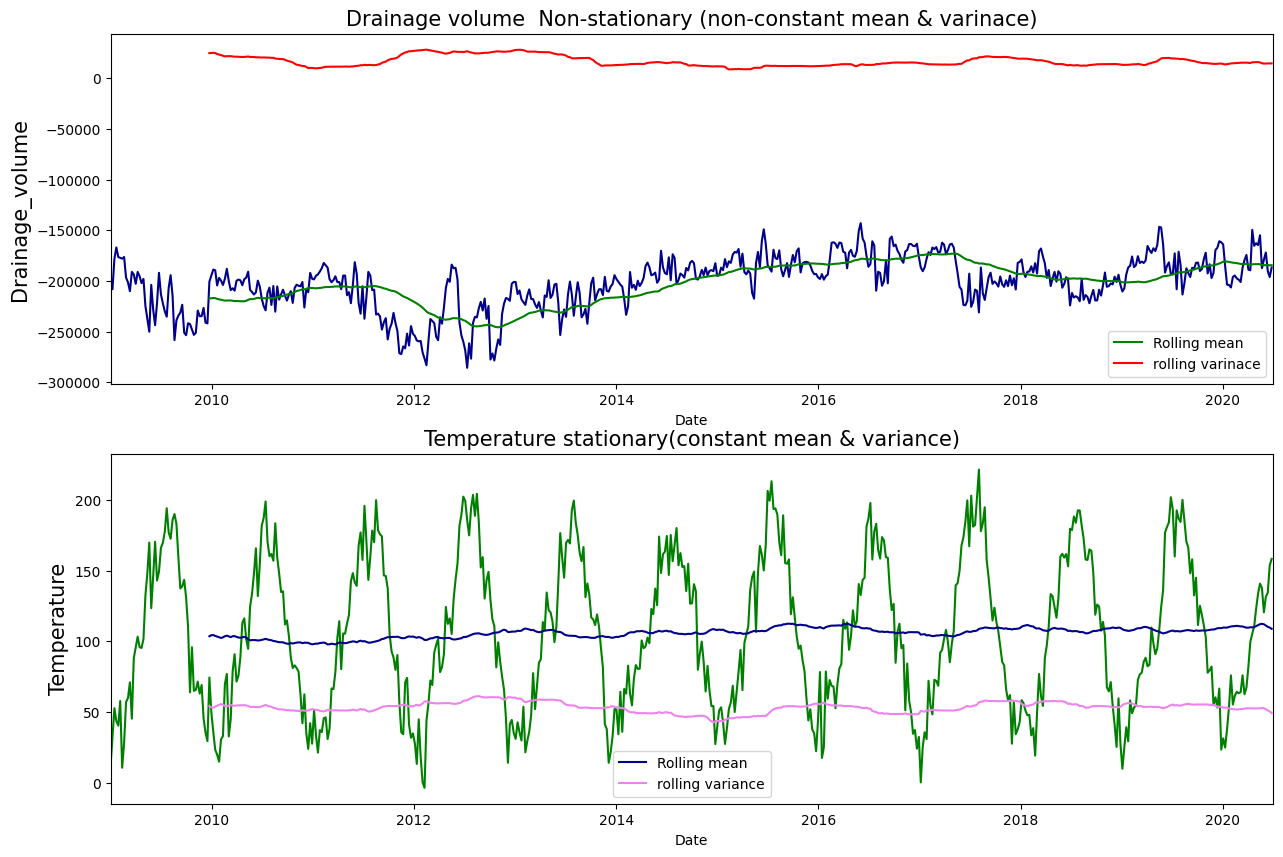

In [17]:
# We will check for stationarity in the drainage volume and temperature columns 
# As we alreadyknow that we resampled the data in weekly form so we will calculate the mean and std of data using rolling window method which means 52 weeks in a year will be our rolling term
# First lets visualize the dataset

rolling_term = 52

fig , ax = plt.subplots(nrows= 2, ncols= 1 , figsize = (15,10))

sns.lineplot(x = downsample['Date'], y = downsample['drainage_vol'], ax = ax[0], color = 'darkblue')
sns.lineplot(x = downsample['Date'], y = downsample['drainage_vol'].rolling(rolling_term).mean(), ax = ax[0], color = 'green', label= 'Rolling mean')
sns.lineplot(x = downsample['Date'], y = downsample['drainage_vol'].rolling(rolling_term).std(), ax= ax[0], color = 'red', label = 'rolling varinace')
ax[0].set_title('Drainage volume  Non-stationary (non-constant mean & varinace)', fontsize = 15)
ax[0].set_ylabel('Drainage_volume', fontsize = 15)
ax[0].set_xlim([date(2009,1,1), date(2020,6,30)])

sns.lineplot(x = downsample['Date'], y = downsample['temperature'], ax = ax[1], color = 'green')
sns.lineplot(x = downsample['Date'], y  = downsample['temperature'].rolling(rolling_term).mean(), ax = ax[1], color = 'darkblue', label = 'Rolling mean')
sns.lineplot(x = downsample['Date'], y = downsample['temperature'].rolling(rolling_term).std(), ax =ax[1], color = 'violet', label= 'rolling variance')
ax[1].set_title('Temperature stationary(constant mean & variance)', fontsize = 15)
ax[1].set_ylabel('Temperature', fontsize = 15)
ax[1].set_xlim([date(2009,1,1), date(2020,6,30)])

- By visualization we can see that the features dont have constant mean or variance but they are very close to it.

**Another way of finding out the stationarity in a time series is finding the Unit root**
- A unit root test is a statistical test used to determine if a time series is stationary or not. It checks for the presence of a unit root in an autoregressive (AR) process, which indicates non-stationarity. 
    - There are several tests for unit roots, including:

        -Augmented Dickey-Fuller (ADF) Test: This is a popular test for unit roots, which involves estimating the following equation:
            -Δy_t = α + βt + γy_(t-1) + δ1Δy_(t-1) + … + δpΔy_(t-p) + ε_t

            - The null hypothesis is that β = 0 (i.e., the presence of a unit root), and the alternative hypothesis is that β < 0 (i.e., no unit root).

        - Phillips-Perron (PP) Test: This test is similar to the ADF test but uses a different approach to estimate the equation.

        - KPSS Test: This test is used to determine if a time series is trend-stationary or not.

    There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

* <font color='red'>**p-value > significance level (default: 0.05)**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**p-value <= significance level (default: 0.05)**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.
    
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.
* <font color='red'>**ADF statistic > critical value**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**ADF statistic < critical value**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.

**Hence we will be using the ADF test on the time series**

In [18]:
from statsmodels.tsa.stattools import adfuller

series = downsample['depth_ground_water']
result = adfuller(series) 

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

ADF Statistic: -2.10112523453006
p-value: 0.24406237983720597
Critical Values:
1% -3.4414256033746606
5% -2.8664262627821473
10% -2.569372254520843


- p-value > 0.05 which means the time series is non-stationary in nature.

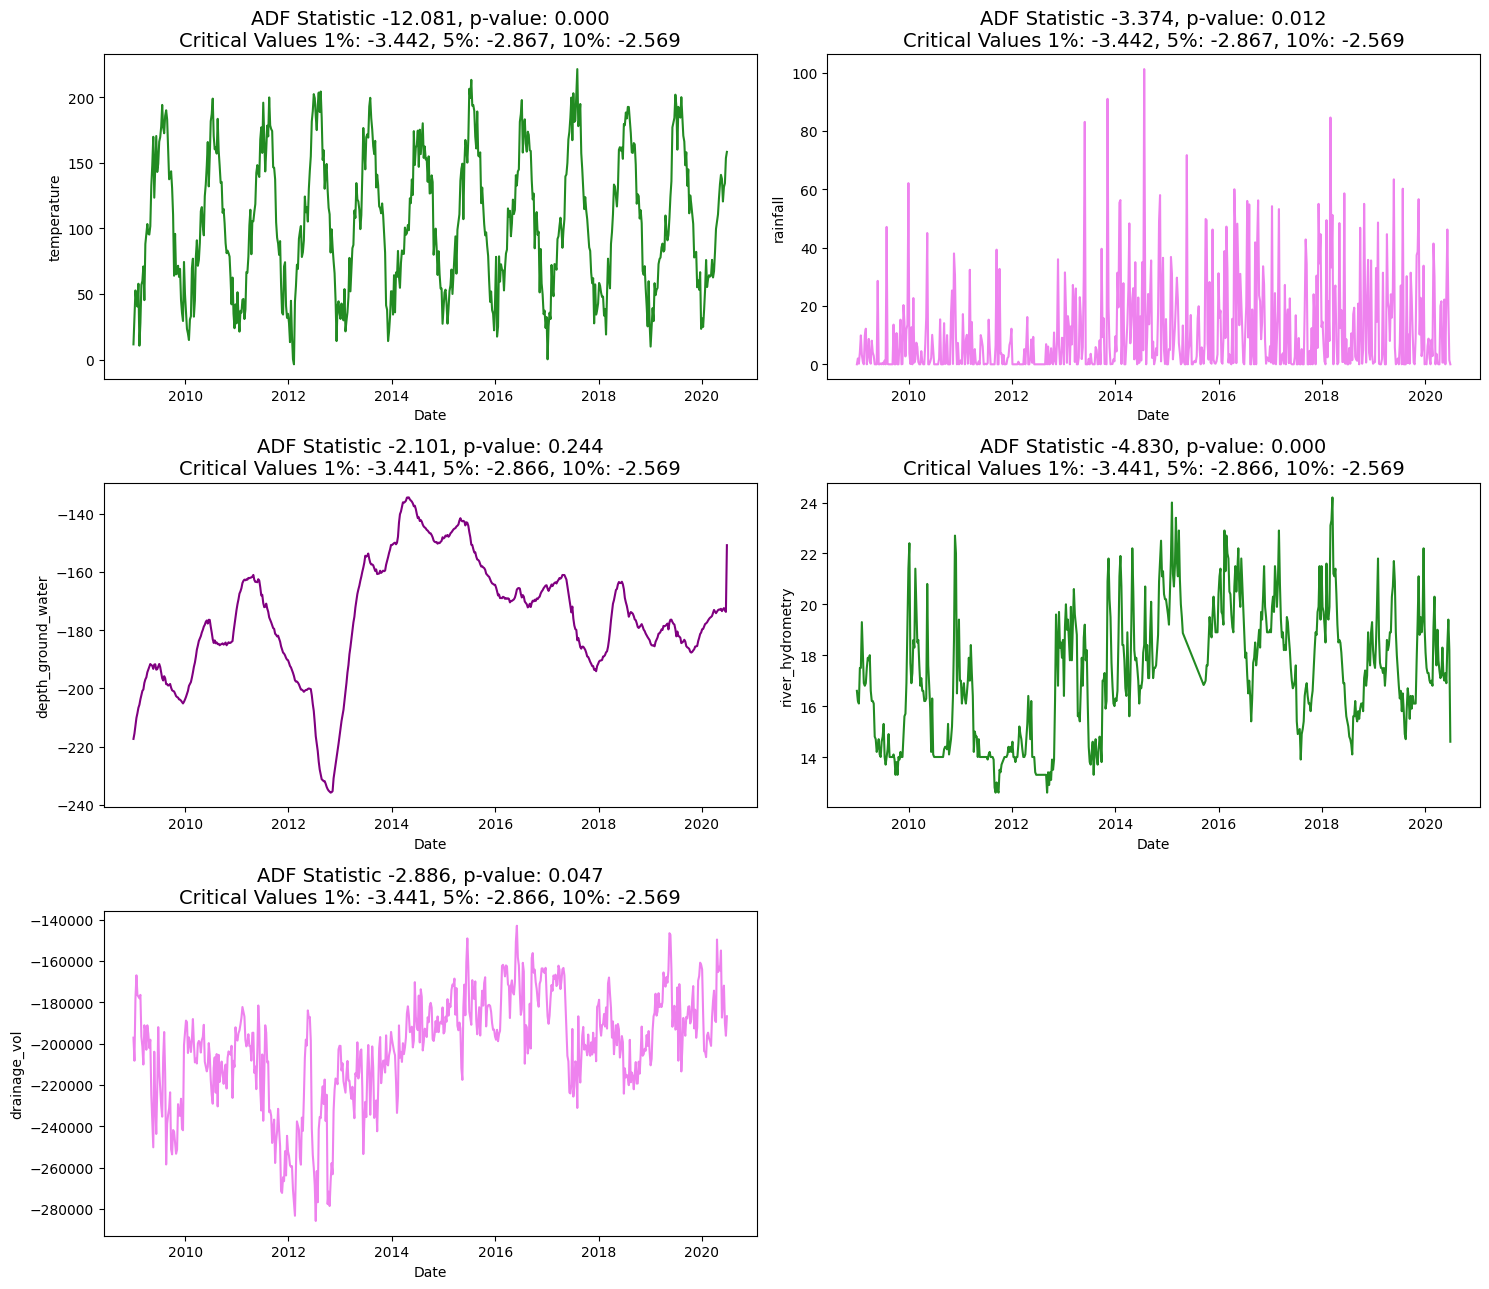

In [19]:
# Now we will find out if all the series present in the dataset follow stationarity or not
# For that we will be making a function for finding the stationarity

f , ax = plt.subplots(nrows= 3, ncols=2, figsize = (15,13))

def visualize_adf_result(series, title, ax): 
    result = adfuller(series)
    signif = 0.05
    adf_stat = result[0]
    p_value = result[1]
    cri_val_1 = result[4]['1%']
    cri_val_5 = result[4]['5%']
    cri_val_10 = result[4]['10%']

    if (p_value < signif) & (adf_stat < cri_val_1):
        linecolor = 'forestgreen'
    elif (p_value < signif) & (adf_stat < cri_val_5):
        linecolor = 'violet'
    elif (p_value < signif) & (adf_stat < cri_val_10): 
        linecolor = 'blue'
    else : 
        linecolor = 'purple'

    sns.lineplot(x=downsample['Date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_value:0.3f}\nCritical Values 1%: {cri_val_1:0.3f}, 5%: {cri_val_5:0.3f}, 10%: {cri_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=10)

visualize_adf_result(downsample['temperature'].values, 'temperature', ax[0,0])
visualize_adf_result(downsample['depth_ground_water'].values, 'depth_ground_water', ax[1,0])
visualize_adf_result(downsample['drainage_vol'].values, 'drainage_vol', ax[2,0])
visualize_adf_result(downsample['rainfall'].values, 'rainfall', ax[0,1])
visualize_adf_result(downsample['river_hydrometry'].values, 'river_hydrometry', ax[1,1])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()


- If we want to implement the ARMA model on the time series then we have to transform the time series and make it stationary.
- The two most common methods to transform the data into stationary are: 
    - **Transformation** : log or square root to stablize the data
    - **Differencing** : subtracts the current value from the previous

**1st we will use the Log Transformation**

C:\Users\yoges\AppData\Local\Temp\ipykernel_6204\3946576429.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(downsample['depth_ground_water'], ax=ax[1])


<Axes: xlabel='depth_ground_water', ylabel='Density'>

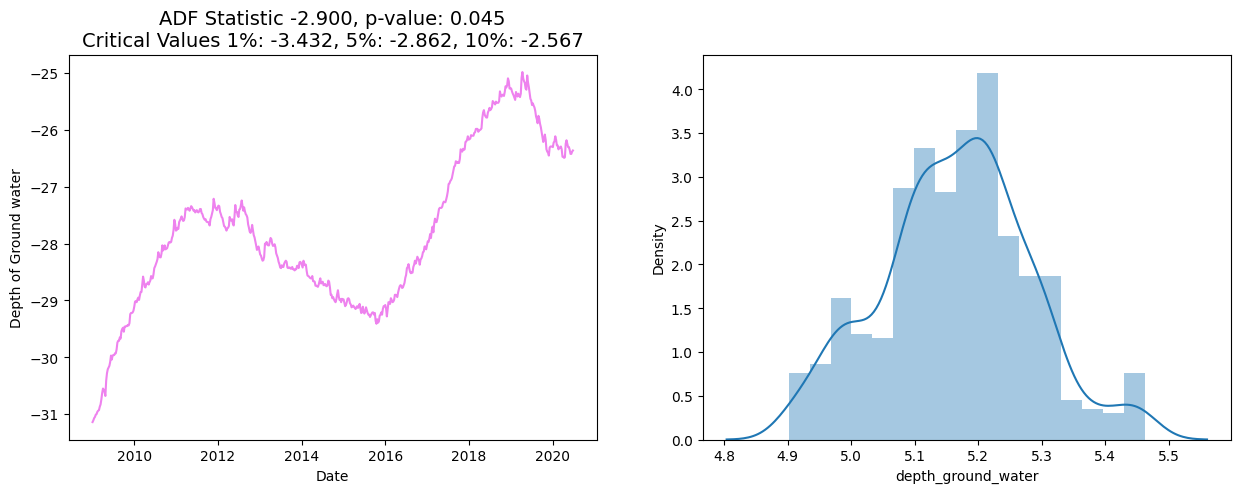

In [20]:
downsample['depth_ground_water'] = np.log(abs(downsample['depth_ground_water']))

f, ax = plt.subplots(ncols=2, nrows=1, figsize = (15,5))
visualize_adf_result(df['depth_ground_water'], 'Depth of Ground water', ax[0])

sns.distplot(downsample['depth_ground_water'], ax=ax[1])

- After interpreting the results we can see that the time series hass become stationary (p-value < 0.05)

**Now will be using the First-order differencing**

p-value : 6.2339242725329266e-06


<Axes: title={'center': 'ADF Statistic -5.273, p-value: 0.000\nCritical Values 1%: -3.441, 5%: -2.866, 10%: -2.569'}, xlabel='Date', ylabel='Depth of ground water'>

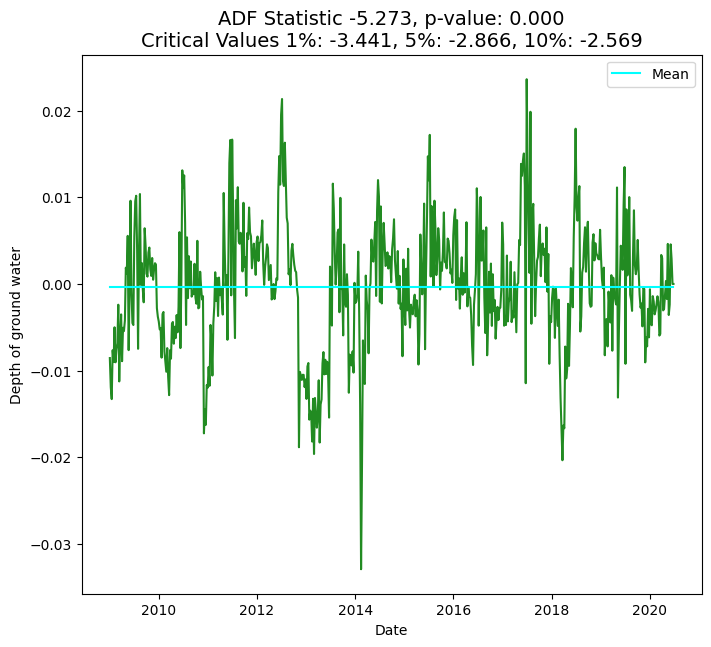

In [21]:
ts_diff = np.diff(downsample['depth_ground_water'])
ts_diff = ts_diff[:-1]
new = [0,0]
ts_diff = np.append(ts_diff, new)
result = adfuller(ts_diff)
print(f"p-value : {result[1]}")

f , ax = plt.subplots(nrows=1, ncols=1, figsize = (8,7))
visualize_adf_result(ts_diff, 'Depth of ground water', ax)
sns.lineplot(x = downsample['Date'], y = ts_diff.mean(), label = 'Mean', ax=ax, color = 'cyan')

# Akaike Information Criterion (AIC)

The Akaike Information Criterion (AIC) is a widely used measure for model selection in statistics. It provides a way to compare different statistical models based on their goodness of fit while penalizing for the number of parameters used in the model

In [22]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.arima.model import ARIMA

# Assuming df is already defined and preprocessed
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

# Prepare the univariate dataframe
univariate_df = df[['Date', 'depth_ground_water']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]
x_train, y_train = train['ds'], train['y']
x_valid, y_valid = univariate_df['ds'].iloc[train_size:, ], univariate_df['y'].iloc[train_size:,]

# Define a range of (p, d, q) values to explore
p = d = q = range(0, 3)  # You can adjust these ranges based on your needs
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_pdq = None
best_model = None

# Loop through all combinations of (p, d, q)
for param in pdq:
    try:
        model = ARIMA(train['y'], order=param)
        results = model.fit()
        
        # Compare AIC values
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
            
    except Exception as e:
        print(f"An error occurred for parameters {param}: {e}")

print(f"Best ARIMA{best_pdq} AIC:{best_aic}")

c:\Users\yoges\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\yoges\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\yoges\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\yoges\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as st

Best ARIMA(2, 2, 2) AIC:-9996.242503447076


c:\Users\yoges\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Bayesian Information Criterion (BIC)

The Bayesian Information Criterion (BIC) is a statistical metric used in model selection to evaluate how well a statistical model fits the data while considering the complexity of the model. In time series analysis, BIC helps choose the most appropriate model by balancing the trade-off between model accuracy and complexity.

Formula for BIC:
BIC
=
−
2
⋅
ln
⁡
(
𝐿
)
+
𝑘
⋅
ln
⁡
(
𝑛
)
BIC=−2⋅ln(L)+k⋅ln(n)
Where:

𝐿
L: Likelihood of the model (how well the model explains the data).
𝑘
k: Number of parameters in the model (including the intercept).
𝑛
n: Number of observations in the data.

In [23]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.arima.model import ARIMA



train_size = int(0.85 * len(df))
test_size = len(df) - train_size


univariate_df = df[['Date', 'depth_ground_water']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]
x_train, y_train = train['ds'], train['y']
x_valid, y_valid = univariate_df['ds'].iloc[train_size:, ], univariate_df['y'].iloc[train_size:, ]

# Define a range of (p, d, q) values to explore
p = d = q = range(0, 3)  # You can adjust these ranges based on your needs
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_bic = np.inf
best_pdq = None
best_model = None

# Loop through all combinations of (p, d, q)
for param in pdq:
    try:
        model = ARIMA(train['y'], order=param)
        results = model.fit()
        
        # Compare AIC and BIC values
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
        
        if results.bic < best_bic:
            best_bic = results.bic
            
    except Exception as e:
        print(f"An error occurred for parameters {param}: {e}")

print(f"Best ARIMA{best_pdq} AIC:{best_aic} BIC:{best_bic}")

# Optionally, you can summarize the best model
if best_model:
    print(best_model.summary())

c:\Users\yoges\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\yoges\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\yoges\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\yoges\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as st

Best ARIMA(2, 2, 2) AIC:-9996.242503447076 BIC:-9965.345102520281
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3569
Model:                 ARIMA(2, 2, 2)   Log Likelihood                5003.121
Date:                Tue, 03 Dec 2024   AIC                          -9996.243
Time:                        13:55:57   BIC                          -9965.345
Sample:                             0   HQIC                         -9985.226
                               - 3569                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6519      0.074      8.815      0.000       0.507       0.797
ar.L2         -0.1982      0.016    -12.520      0.000      -0.22

c:\Users\yoges\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# **Implementation of the ARIMA model on the target feature**

- ARIMA (AutoRegressive Integrated Moving Average) is a popular statistical model used to forecast future values in a time series based on past values. It's a powerful tool for analyzing and predicting time series data, which is common in many fields, such as finance, economics, engineering, and more.

- Components of ARIMA

    - AutoRegressive (AR): This component uses past values of the time series to forecast future values. The AR component is based on the idea that the current value of a time series is a function of past values.
    - Integrated (I): This component accounts for the presence of non-stationarity in the time series, which means that the mean or variance of the series changes over time. The integrated component involves differencing the time series to make it stationary.
    - Moving Average (MA): This component uses the errors (residuals) from the AR component as predictors. The MA component is based on the idea that the current value of a time series is a function of past errors

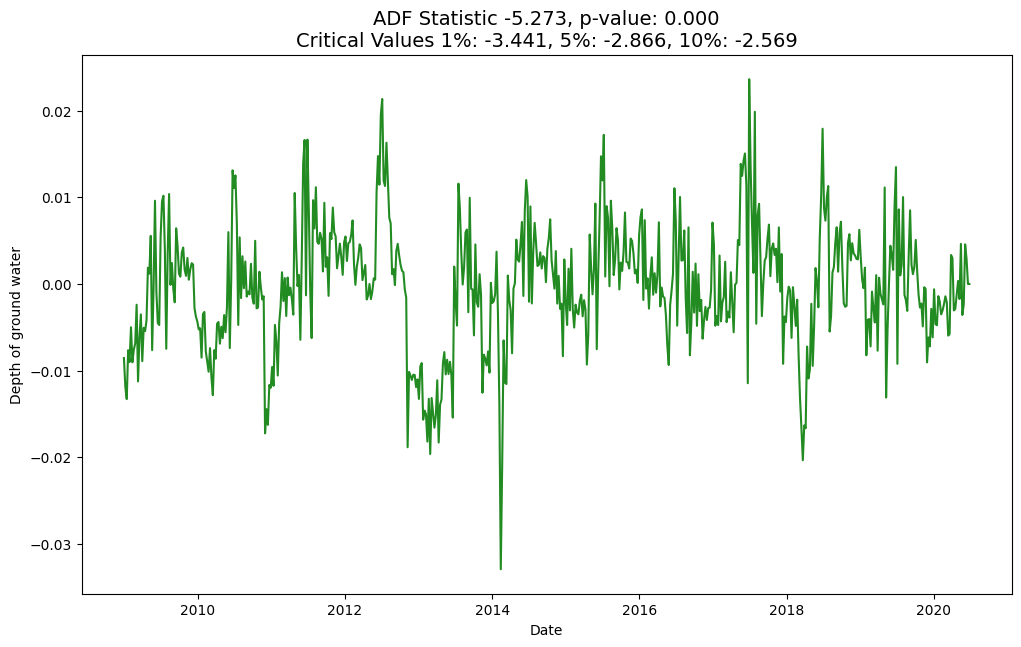

In [24]:
# First we will be plotting the data

#check for stationarity 

f , ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
visualize_adf_result(ts_diff, 'Depth of ground water', ax)

# If p-value is < 0.05 data is stationary in nature otherwise not

- Now as the data is presented in the stationary format we have to find out the p, d and q values for ARIMA model. 
- pmdarima library automatically does that it tells us best p, d and q value after interpreting all the values results and you can do that manually also if you want to :)

In [25]:
from statsmodels.tsa.arima.model import ARIMA
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['Date', 'depth_ground_water']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

3569 630


In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(630)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

RMSE: 0.6283141161613882


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print(f"MAE : {score_mae}\n RMSE : {score_rmse}")


MAE : 0.5250623838949835
 RMSE : 0.6283141161613882


In [28]:
pred = model_fit.predict(start=1, end=len(df)-1)
pred

1      -31.140000
2      -31.103797
3      -31.062884
4      -31.047464
5      -31.001913
          ...    
4194   -25.596203
4195   -25.596203
4196   -25.596203
4197   -25.596203
4198   -25.596203
Name: predicted_mean, Length: 4198, dtype: float64

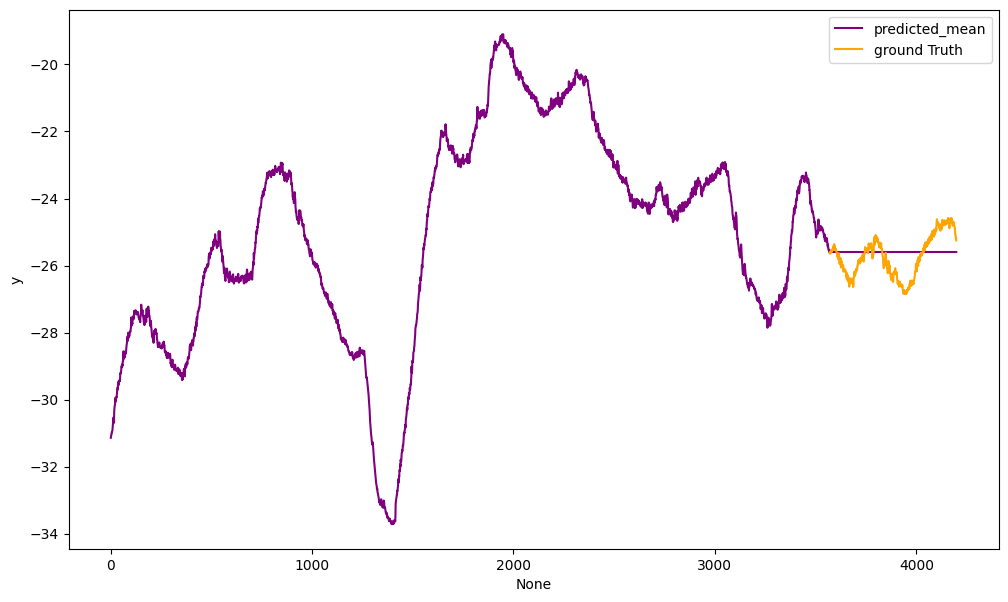

In [29]:
f, ax = plt.subplots(1, figsize = (12,7))


pred.plot(legend = True,ax= ax, color= 'purple')
sns.lineplot(x= x_valid.index, y= y_valid['y'], ax=ax, color = 'orange', label = 'ground Truth')
plt.show()


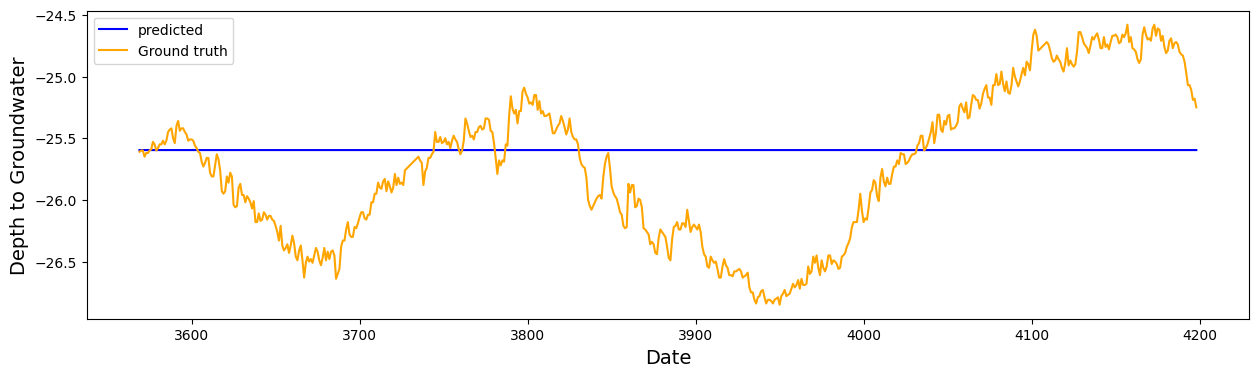

In [30]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_valid.index, y=y_pred, ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [31]:
df.tail()

,Date,rainfall,depth_ground_water,temperature,drainage_vol,river_hydrometry
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4
4198,2020-06-30,0.0,-25.25,27.3,-31878.144,2.4


In [32]:
df.shape

(4199, 6)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error

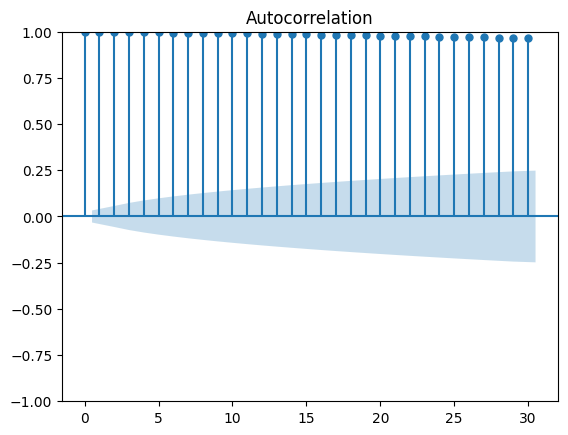

In [34]:
plot_acf(y_train, lags=30)
plt.show()

In [35]:
# Fit the AR model
lag_order = 5  # Choose based on ACF or domain knowledge
model = AutoReg(y_train, lags=lag_order)
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3569
Model:                     AutoReg(5)   Log Likelihood                4882.307
Method:               Conditional MLE   S.D. of innovations              0.061
Date:                Tue, 03 Dec 2024   AIC                          -9750.615
Time:                        13:59:07   BIC                          -9707.364
Sample:                             5   HQIC                         -9735.193
                                 3569                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0142      0.008     -1.730      0.084      -0.030       0.002
y.L1           1.2140      0.017     72.567      0.000       1.181       1.247
y.L2          -0.2685      0.026    -10.196      0.0

Mean Squared Error: 0.7241600750070125


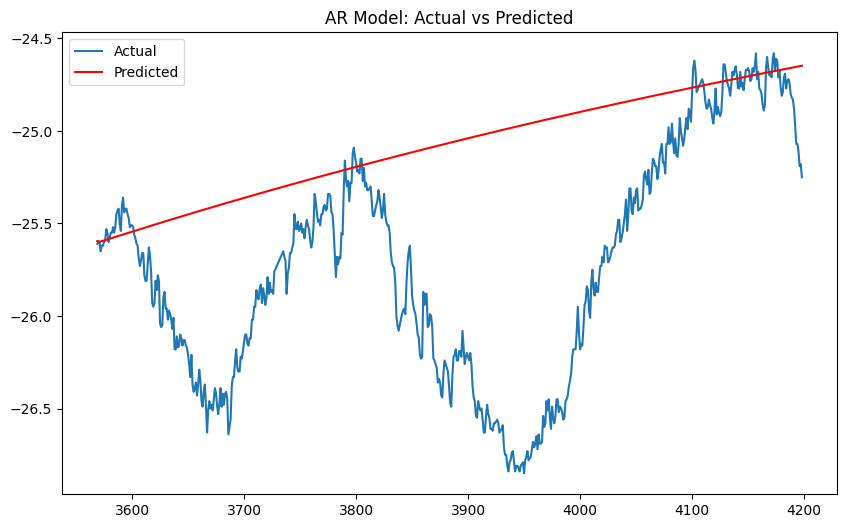

In [38]:
# Forecast
predictions = fitted_model.predict(start=len(y_train), end=len(y_train) + len(y_valid) - 1, dynamic=False)

# Calculate performance metrics
mse = mean_squared_error(y_valid, predictions)
print(f"Mean Squared Error: {mse}")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_valid.index, y_valid, label="Actual")
plt.plot(y_valid.index, predictions, label="Predicted", color="red")
plt.title("AR Model: Actual vs Predicted")
plt.legend()
plt.show()

